In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt


In [2]:
# Exercise 1
def G(row_s, Temp):
    return np.exp(1/Temp * row_s[:-1]@row_s[1:].T)


In [3]:

# Exercise 2
def F(row_s, row_t, Temp):
    return np.exp(1/Temp * row_s@row_t.T)


In [4]:
# exercise 3
# to achive the Ztemp definition we can combine G and F with exponent multipication rules
def Ztemp_2(Temp):
    # options = np.array(np.meshgrid([-1,1],[-1,1])).T.reshape(-1,2)
    options = itertools.product([-1,1], repeat = 4)
    res = 0
    for option in options:
        grid = np.array(option).reshape(2,2)
        row_s = grid[0]
        row_t = grid[1]
        res += G(row_s,Temp)*G(row_t,Temp)*F(row_s,row_t,Temp);
    return res
print("Temp:1, size: 2x2, Ztemp: ",Ztemp_2(1))
print("Temp:1.5, size: 2x2, Ztemp: ",Ztemp_2(1.5))
print("Temp:2, size: 2x2, Ztemp: ",Ztemp_2(2))


Temp:1, size: 2x2, Ztemp:  121.23293134406595
Temp:1.5, size: 2x2, Ztemp:  40.922799092745386
Temp:2, size: 2x2, Ztemp:  27.048782764334526


In [5]:
# Exercise 4
def Ztemp_3(Temp):
    # options = np.array(np.meshgrid([-1,1],[-1,1])).T.reshape(-1,2)
    options = itertools.product([-1,1], repeat = 9)
    res = 0
    for option in options:
        grid = np.array(option).reshape(3,3)
        
        res += G(grid[0],Temp)*G(grid[1],Temp)*G(grid[2],Temp) \
                *F(grid[0],grid[1],Temp)*F(grid[1],grid[2],Temp);
    return res
print("Temp:1, size: 3x3, Ztemp: ",Ztemp_3(1))
print("Temp:1.5, size: 3x3, Ztemp: ",Ztemp_3(1.5))
print("Temp:2, size: 3x3, Ztemp: ",Ztemp_3(2))


Temp:1, size: 3x3, Ztemp:  365645.7491357704
Temp:1.5, size: 3x3, Ztemp:  10565.421983514265
Temp:2, size: 3x3, Ztemp:  2674.518123060087


In [6]:
# Exrecise 5+6
def y2row(y,width=8):
    """
    y: an integer in (0,...,(2**width)-1)
    """
    if not 0<=y<=(2**width)-1:
        raise ValueError(y)
    my_str=np.binary_repr(y,width=width)
    # my_list = map(int,my_str) # Python 2
    my_list = list(map(int,my_str)) # Python 3
    my_array = np.asarray(my_list)
    my_array[my_array==0]=-1
    row=my_array
    return row

def Ztemp_ys(Temp, size):
    res =0
    for yS in itertools.product([y2row(num,size) for num in range(2**size)], repeat=size):
        inner_res = 1 
        for y_i in yS:
            inner_res *= G(y_i,Temp)
        for i in range(size-1):
            inner_res *= F(yS[i],yS[i+1],Temp)
        res += inner_res
    return res
print("Temp:1, size: 2x2, Ztemp: ",Ztemp_ys(1,2))
print("Temp:1.5, size: 2x2, Ztemp: ",Ztemp_ys(1.5,2))
print("Temp:2, size: 2x2, Ztemp: ",Ztemp_ys(2,2))
print(" ")
print("Temp:1, size: 3x3, Ztemp: ",Ztemp_ys(1,3))
print("Temp:1.5, size: 3x3, Ztemp: ",Ztemp_ys(1.5,3))
print("Temp:2, size: 3x3, Ztemp: ",Ztemp_ys(2,3))

Temp:1, size: 2x2, Ztemp:  121.23293134406595
Temp:1.5, size: 2x2, Ztemp:  40.922799092745386
Temp:2, size: 2x2, Ztemp:  27.048782764334526
 
Temp:1, size: 3x3, Ztemp:  365645.7491357704
Temp:1.5, size: 3x3, Ztemp:  10565.421983514265
Temp:2, size: 3x3, Ztemp:  2674.518123060087


In [7]:
def get_Ts(size, Temp):
    Ts = []
    y_range = range(2**size)
    T1 = [sum([G(y2row(y1,size),Temp)*F(y2row(y1,size),y2row(y2,size),Temp) \
                        for y1 in y_range]) \
                            for y2 in y_range]
    Ts.append(T1)
    Tprev = T1
    for _ in range(1,size-1):
        Tnext = [sum([Tprev[y1]*G(y2row(y1,size),Temp)*F(y2row(y1,size),y2row(y2,size),Temp) \
                        for y1 in y_range]) \
                            for y2 in y_range]
        Ts.append(Tnext)
        Tprev = Tnext
    Tlast = sum([Tprev[y]*G(y2row(y,size),Temp) for y in y_range])
    Ts.append(Tlast)
    return Ts

In [8]:

def get_ps(size, Temp, Ts):
    y_range = range(2**size)
    Ztemp = Ts[-1]
    ps = []
    p_first = lambda y: Ts[-2][y]*G(y2row(y,size),Temp)/Ztemp
    ps.append(p_first)
    p_prev = p_first
    for i in range(size-2, 0, -1):
        p_next = lambda y1,y2: Ts[i-1][y1]* G(y2row(y1,size),Temp)*F(y2row(y1,size),y2row(y2,size),Temp) \
              / Ts[i][y2]
        ps.append(p_next)
        p_prev = p_next
    p_last = lambda y1,y2: G(y2row(y1,size),Temp)*F(y2row(y1,size),y2row(y2,size),Temp) / Ts[0][y2]
    ps.append(p_last)
    return ps

In [9]:
def get_ps_table(size, Temp, ps):
    ps_table = []
    y_range = range(2**size)
    ps_table.append([ps[0](y) for y in y_range])
    for i in range(1,size):
        ps_table.append([[ps[i](y1,y2) for y1 in y_range] for y2 in y_range])
    return ps_table



In [10]:
def single_sample(size, Temp, Ts, ps_table):
    # Ts = get_Ts(size, Temp)
    # ps = get_ps(size, Temp, Ts)
    sample = []
    y_range = range(2**size)
    y_first = np.random.choice(y_range, p=ps_table[0])
    sample.append(y_first)
    y_prev = y_first
    for i in range(1,size):
        y_next =  np.random.choice(y_range, p=ps_table[i][y_prev])
        sample.append(y_next)
        y_prev = y_next
    #no need for last
    parsed_sample = np.array([np.array(y2row(y,size)) for y in sample])
    return parsed_sample


In [11]:

def sample_n(n, size, Temp):
    Ts = get_Ts(size, Temp)
    ps = get_ps(size, Temp, Ts)
    ps_table = get_ps_table(size,Temp, ps)
    samples = np.empty((n,size,size))
    for i in range(n):
        samples[i] = single_sample(size,Temp, Ts, ps_table)
    return samples


In [12]:
# Exercise 7

fig, axs = plt.subplots(nrows=3, ncols= 10)
for i, Temp in enumerate([1,1.5,2]):
    exact_samples = sample_n(10, 8, Temp)
    for j, sample in enumerate(exact_samples):
        axs[i,j].imshow(sample, interpolation='None')
        axs[i,j].axis('off')
        if j==0:
            axs[i,j].set_title('temp={}'.format(Temp))




KeyboardInterrupt: 

In [82]:
# Exercise 8
import time
size = 8
n = 10000
for Temp in [1,1.5,2]:
    Ts = get_Ts(size, Temp)
    ps = get_ps(size, Temp, Ts)
    ps_table = get_ps_table(size,Temp, ps)
    Sum_1122 = 0
    Sum_1188 = 0
    for _ in range(n):
        s = single_sample(size,Temp, Ts, ps_table)
        Sum_1122 += s[0,0]*s[1,1] 
        Sum_1188 += s[0,0]*s[7,7] 
    print("Temp:{}, E_X({},{})X({},{}): {}".format(Temp,1,1,2,2,Sum_1122/n))
    print("Temp:{} , E_X({},{})X({},{}): {}".format(Temp,1,1,8,8,Sum_1188/n))


TypeError: 'int' object is not callable

In [ ]:

# Using the results of the Computer Exercise above, 
# explain the relative values of Eb, in terms of the spatial distance of the lattice sites and in terms
# of the temperature.

In [ ]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [14]:
def random_lattice(size):
    return np.random.randint(low=0,high=2,size=(size,size))*2-1

In [23]:
# Exercise 9
size = 8 
n = 10000
n_shifts = 25
neigbs_indecis = np.array([
    np.array([1,0,-1,0]),
    np.array([0,1,0,-1])
])
sample = np.pad(random_lattice(size),1, pad_with)
# Independent Samples
for Temp in [1,1.5,2]:
    Sum_1122 = 0
    Sum_1188 = 0
    for _ in range(n):
        smpl = np.pad(random_lattice(size),1, pad_with)
        for _ in range(n_shifts):
            for i in range(1,size+1):
                for j in range(1,size+1):
                    neibs = np.array(smpl[(neigbs_indecis[0]+i, neigbs_indecis[1]+j)])
                    in_exp = np.sum(neibs) / Temp
                    plus_ratio = np.exp(in_exp)
                    minus_ratio = np.exp(-in_exp)
                    p = [plus_ratio, minus_ratio] / (plus_ratio + minus_ratio)
                    smpl[i,j] = np.random.choice([1,-1], p=p)
        Sum_1122 += smpl[1,1]*smpl[2,2]
        Sum_1188 += smpl[1,1]*smpl[size,size]
    print("Temp:{}, E_X({},{})X({},{}): {}".format(Temp,1,1,2,2,Sum_1122/n))
    print("Temp:{} , E_X({},{})X({},{}): {}".format(Temp,1,1,8,8,Sum_1188/n))


Temp:1, E_X(1,1)X(2,2): 0.9242
Temp:1 , E_X(1,1)X(8,8): 0.5484
Temp:1.5, E_X(1,1)X(2,2): 0.7478
Temp:1.5 , E_X(1,1)X(8,8): 0.3632
Temp:2, E_X(1,1)X(2,2): 0.4954
Temp:2 , E_X(1,1)X(8,8): 0.0984


In [32]:
# Exercise 9
size = 8 
n_burnouts = 100
n_shifts = 250000
for Temp in [1,1.5,2]:
    Sum_1122 = 0
    Sum_1188 = 0 
    smpl = np.pad(random_lattice(size),1, pad_with)
    for k in range(n_shifts):
        for i in range(1,size+1):
            for j in range(1,size+1):
                neibs = np.array(smpl[(neigbs_indecis[0]+i, neigbs_indecis[1]+j)])
                in_exp = np.sum(neibs) / Temp
                plus_ratio = np.exp(in_exp)
                minus_ratio = np.exp(-in_exp)
                p = [plus_ratio, minus_ratio] / (plus_ratio + minus_ratio)
                smpl[i,j] = np.random.choice([1,-1], p=p)
        if k > n_burnouts: 
            Sum_1122 += smpl[1,1]*smpl[2,2]
            Sum_1188 += smpl[1,1]*smpl[size,size]
    print("Temp:{}, E_X({},{})X({},{}): {}".format(Temp,1,1,2,2,Sum_1122/(n_shifts-n_burnouts)))
    print("Temp:{} , E_X({},{})X({},{}): {}".format(Temp,1,1,8,8,Sum_1188/(n_shifts-n_burnouts)))

Temp:1, E_X(1,1)X(2,2): 0.9489898989898989
Temp:1 , E_X(1,1)X(8,8): 0.9035353535353535
Temp:1.5, E_X(1,1)X(2,2): 0.7706060606060606
Temp:1.5 , E_X(1,1)X(8,8): 0.5596969696969697
Temp:2, E_X(1,1)X(2,2): 0.5233333333333333
Temp:2 , E_X(1,1)X(8,8): 0.12070707070707071


In [53]:
def gibbs_sample(size, Temp, n_sweeps):
    smpl = np.pad(random_lattice(size),1, pad_with)
    for k in range(n_sweeps):
        for i in range(1,size+1):
            for j in range(1,size+1):
                neibs = np.array(smpl[(neigbs_indecis[0]+i, neigbs_indecis[1]+j)])
                in_exp = np.sum(neibs) / Temp
                plus_ratio = np.exp(in_exp)
                minus_ratio = np.exp(-in_exp)
                p = [plus_ratio, minus_ratio] / (plus_ratio + minus_ratio)
                smpl[i,j] = np.random.choice([1,-1], p=p)
    return smpl[1:-1,1:-1] # padding removed


In [65]:
def posterior_gibbs_sample(size, Temp, n_sweeps, y, sigma):
    smpl = np.pad(random_lattice(size),1, pad_with)
    y_padded = np.pad(y,1, pad_with)
    for k in range(n_sweeps):
        for i in range(1,size+1):
            for j in range(1,size+1):
                neibs = np.array(smpl[(neigbs_indecis[0]+i, neigbs_indecis[1]+j)])
                plus_ratio = np.exp(np.sum(neibs) / Temp \
                               - np.square(y_padded[i,j] + 1) / (2*(sigma**2))) 
                minus_ratio = np.exp(-np.sum(neibs) / Temp \
                                - np.square(y_padded[i,j] -1) / (2*(sigma**2))) 
                p = [plus_ratio, minus_ratio] / (plus_ratio + minus_ratio)
                smpl[i,j] = np.random.choice([1,-1], p=p)
    return smpl[1:-1,1:-1] # padding removed

In [69]:
def max_posterior_gibbs(size, Temp, n_sweeps, y, sigma):
    smpl = np.pad(random_lattice(size),1, pad_with)
    y_padded = np.pad(y,1, pad_with)
    for k in range(n_sweeps):
        for i in range(1,size+1):
            for j in range(1,size+1):
                neibs = np.array(smpl[(neigbs_indecis[0]+i, neigbs_indecis[1]+j)])
                plus_ratio = np.exp(np.sum(neibs) / Temp \
                               - np.square(y_padded[i,j] + 1) / (2*(sigma**2))) 
                minus_ratio = np.exp(-np.sum(neibs) / Temp \
                                - np.square(y_padded[i,j] -1) / (2*(sigma**2))) 
                smpl[i,j] = np.argmax([minus_ratio, plus_ratio])*2 -1
    return smpl[1:-1,1:-1] # padding removed

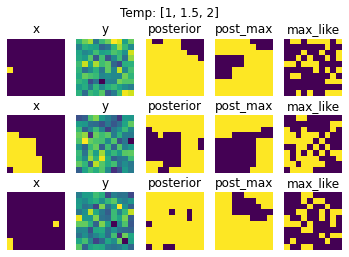

In [75]:
# Exercise 10

size = 10
n_sweeps = 50

fig, axs = plt.subplots(nrows=3, ncols= 5)
fig.suptitle("Temp: [1, 1.5, 2]".format(Temp))
for i, Temp in enumerate([1,1.5,2]):
    x = gibbs_sample(size, Temp, n_sweeps)
    eta = 2* np.random.standard_normal(size=(size,size))
    y = x + eta
    posterior_sample = posterior_gibbs_sample(size, Temp,n_sweeps, y , 2)
    posterior_max = max_posterior_gibbs(size, Temp,n_sweeps, y , 2)
    max_likelihood = np.sign(y)
    for ax in axs[i]:
        ax.axis('off')
    axs[i,0].imshow(x, interpolation= 'None')
    axs[i,0].set_title('x')
    axs[i,1].imshow(y, interpolation= 'None')
    axs[i,1].set_title('y')
    axs[i,2].imshow(posterior_sample, interpolation= 'None')
    axs[i,2].set_title('posterior')
    axs[i,3].imshow(posterior_max, interpolation= 'None')
    axs[i,3].set_title('post_max')
    axs[i,4].imshow(max_likelihood, interpolation= 'None')
    axs[i,4].set_title('max_like')


    # exact_samples = sample_n(10, 8, Temp)
    # for j, sample in enumerate(exact_samples):
    #     axs[i,j].imshow(sample, interpolation='None')
    #     axs[i,j].axis('off')
    #     if j==0:
    #         axs[i,j].set_title('temp={}'.format(Temp))

